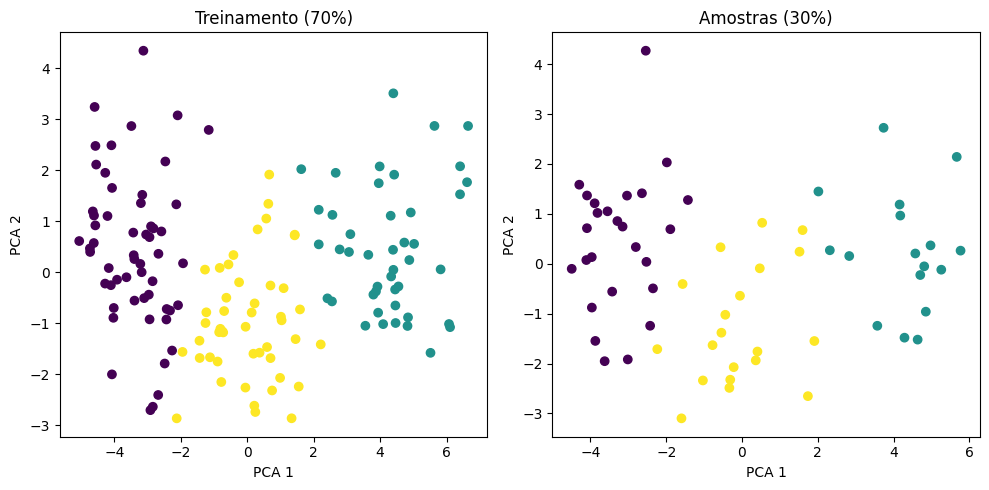

In [3]:
# Aula 09 - K-Means com PCA no Dataset Seeds

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Carregar o dataset
seeds_df = pd.read_csv('seeds.csv', header=None)

# 2. Remover a coluna de classe, se presente (última coluna)
seeds_array = seeds_df.iloc[:, :-1].to_numpy()

# 3. Separar em treino (70%) e amostras (30%)
train, samples = train_test_split(seeds_array, test_size=0.3, random_state=42)

# 4. Instanciar e treinar o modelo K-Means
model = KMeans(n_clusters=3, random_state=42)
model.fit(train)

# 5. Prever os rótulos
labels_train = model.predict(train)
labels_samples = model.predict(samples)

# 6. Aplicar PCA para redução de dimensionalidade (2D)
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train)
samples_pca = pca.transform(samples)

# 7. Visualizar os dados com scatter plot
plt.figure(figsize=(10, 5))

# Gráfico dos dados de treino
plt.subplot(1, 2, 1)
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=labels_train, cmap='viridis')
plt.title('Treinamento (70%)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Gráfico das amostras (teste)
plt.subplot(1, 2, 2)
plt.scatter(samples_pca[:, 0], samples_pca[:, 1], c=labels_samples, cmap='viridis')
plt.title('Amostras (30%)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()
